# Computational Vision - Laboratory

==============================================================================================
## Practice 8: Image Segmentation

==============================================================================================

The main topic of this practice is to understand different **Top-down segmentation algorithms.**

In order to successfuly complete this practice it is necessary to understand the following theory concepts: snakes, level sets, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 8.1 Top down segmentation algorithms

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)
- Add title to the figures to explain what is displayed.

In [244]:
%matplotlib inline

a) Read **'empty_plate.jpeg'** from the folder 'images' and segment it using **Active Contours.**
- Use different potentials and see the behaviour of the active contours algorithm.
- Test different parameters in order to obtain a good image segmentation. 
- How does each parameter behave? Which are the optimal values?
- Comment what algorithm is the method based in up to 3 lines most.

**Hint**
- Different potentials could be to use the original image itself, smoothed image (using Gaussian filter) and edge maps (using Canny).

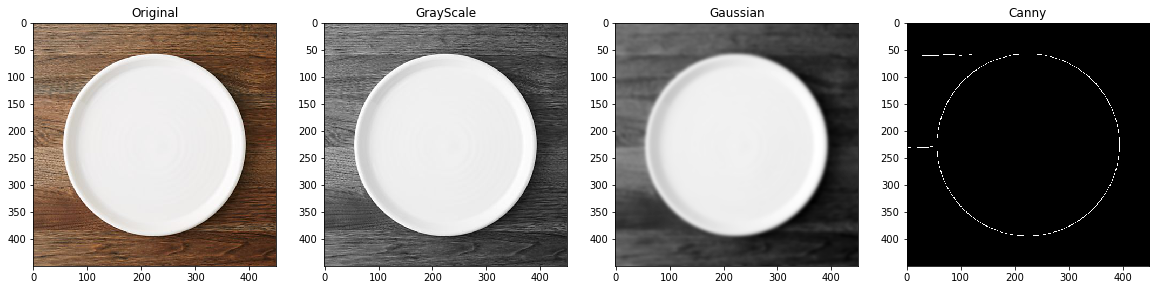

In [372]:
import os
import matplotlib.pyplot as plt

from skimage import io
from skimage.filters import gaussian
from skimage.feature import canny

img = io.imread(os.path.join('images', 'empty_plate.jpeg'))

potentials = [
    ('Original', img),
    ('GrayScale', rgb2gray(img)),
    ('Gaussian', gaussian(rgb2gray(img), 3)),
    ('Canny', canny(rgb2gray(img), 3)),
]

f, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, p in enumerate(potentials):
    if len(p[1].shape) == 2:
        ax[i].imshow(p[1], cmap=plt.cm.gray)
    else:
        ax[i].imshow(p[1])
    ax[i].set_title(p[0])
plt.show()

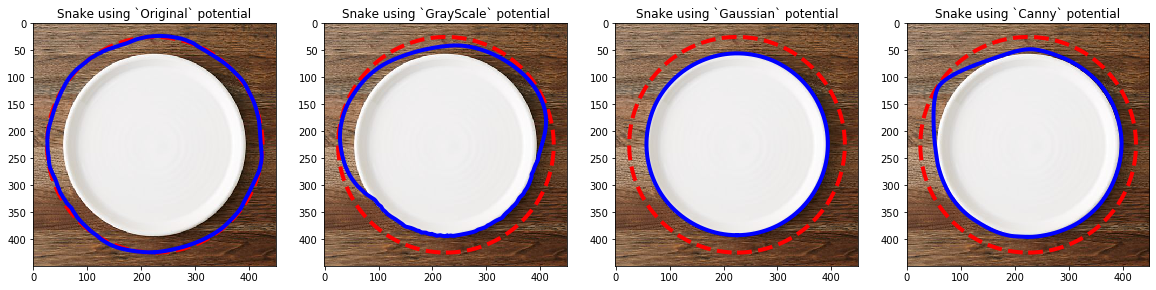

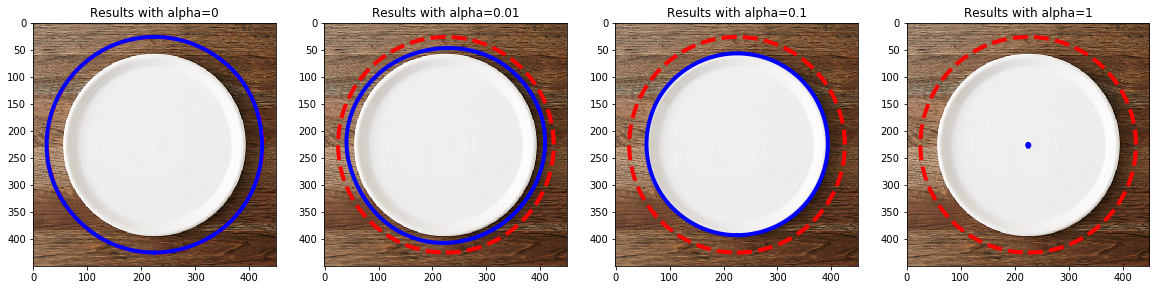

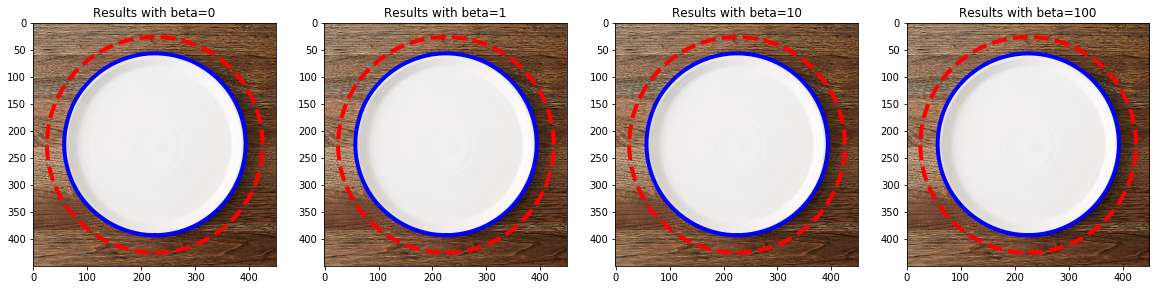

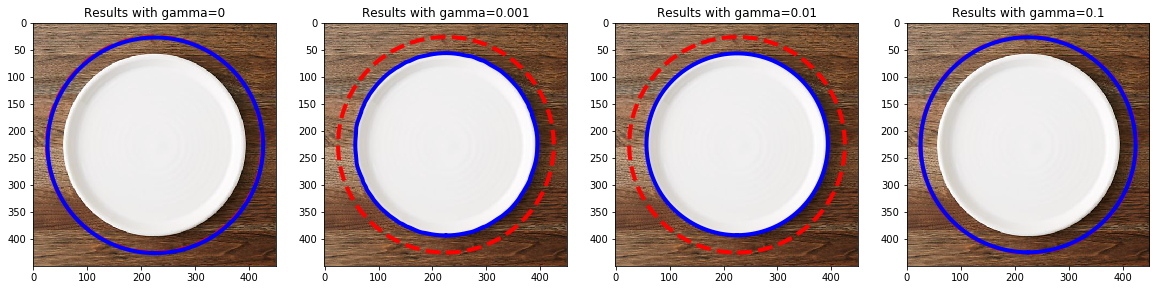

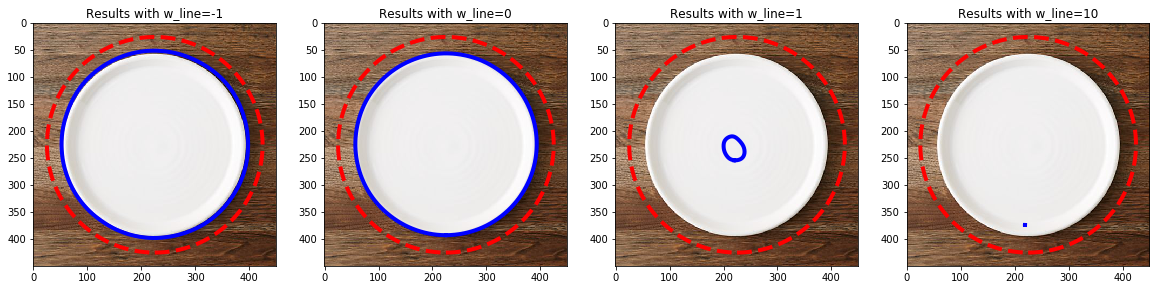

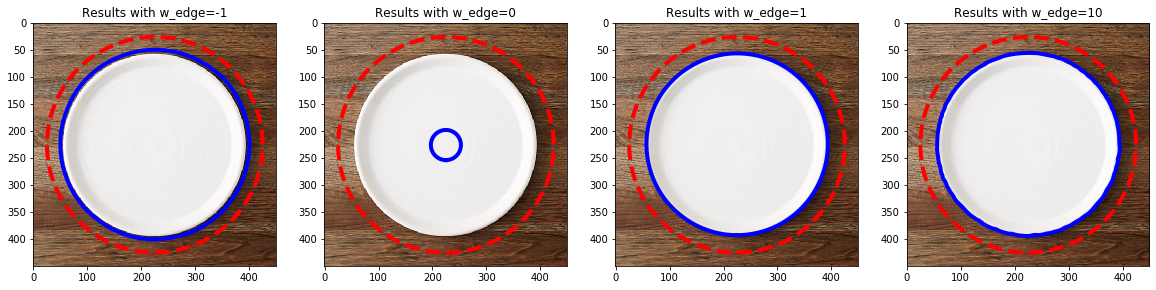

In [290]:
import numpy as np

from skimage.color import rgb2gray
from skimage import segmentation as seg
from skimage import filters as filt

def create_circumference(center, radius):
    s = np.linspace(0, 2 * np.pi, 400)
    r = center[0] / 2 + radius * np.sin(s)
    c = center[1] / 2 + radius * np.cos(s)
    return np.array([r, c]).T

#### Compare different potentials ####

f, ax = plt.subplots(1, 4, figsize=(20, 5))

snake = create_circumference((img.shape[0], img.shape[1]), 200)

for i, p in enumerate(potentials):
    opt_snake = seg.active_contour(p[1], snake=snake, alpha=0.1, beta=10, coordinates='rc')

    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Snake using `{p[0]}` potential')
    
plt.show()

#### Compare Parameters ####

### ALPHA

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, alpha in enumerate([0, 0.01, 0.1, 1]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=alpha, beta=10, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with alpha={alpha}')

plt.show()

### BETA

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, beta in enumerate([0, 1, 10, 100]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=0.1, beta=beta, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with beta={beta}')

plt.show()

### GAMMA

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, gamma in enumerate([0, 0.001, 0.01, 0.1]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=0.1, beta=10, gamma=gamma, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with gamma={gamma}')

plt.show()

### W_LINE

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, w_line in enumerate([-1, 0, 1, 10]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=0.1, beta=10, w_line=w_line, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with w_line={w_line}')

plt.show()

### W_EDGE

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, w_edge in enumerate([-1, 0, 1, 10]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=0.1, beta=10, w_edge=w_edge, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with w_edge={w_edge}')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Effect of different potential images:**
    
We try the effect of using different initial images to apply the algorithm to, the raw image, converted to GrayScale and applying a Gaussian or a Canny filter. The best result is obtained with the *Gaussian filter*, as the non-filtered images (original and grayscale) have a lot of edges for the table woord pattern lines, which are smoothed using the Gaussian filter. Using Canny we should obtain even better results as we only have to deal with the edges we are interested in, and the rest is removed, but finding the optimal parameters for Canny is difficult, and it usually produces some background noisy edges which confuse the snake and give undesired results.
    
**Effect of different parameters:**
    
We will only do some experiments for the most relevant parameters.

- __*alpha*__ controls how fast the snake contracts. Using 0 the snake doesn't contract and the optimized snake is equivalent to the original one. Using 0.01 is still to slow and the snake is unable to reach the desired contour and using too large values such as 1, produce the snake to contract too fast, converging in a single point. A value of *0.1* produces good results.
- __*beta*__ makes the output snake line smoother the greater this values is.
- __*gamma*__ sets explicitly the time step for each iterations. We've found that the default parameter *0.01* works perfectly fine.
- __*w_line*__ weight indicates the attraction to brighter regions, using negative values to be attracted to darker regions. Default parameter value *0* works fine, as with negative values doesn't get close enough to the plate, and with positives the snake contracts too much inside the plate.
- __*w_edge*__ weight indicates the level of attraction to edges, using negative values to repel those. Default parameter value *1* works fine, as with negative values it doesn't get close enough to plate edges, with 0 it ignores the edge of the plate and with large positive values gets the same result than with 1 but getting a rougher snake.
    

**Algorithm base:** 
   
</div>

b) Segment the previous image using **Chan Vese.** 
- Test different parameters in order to obtain a good image segmentation.
- How does each parameter behave? Upto your opinion, which are the optimal values?
- Comment what algorithm is the method based in up to 3 lines.
- Plot the original image and the corresponding segments obtained from the algorithm.

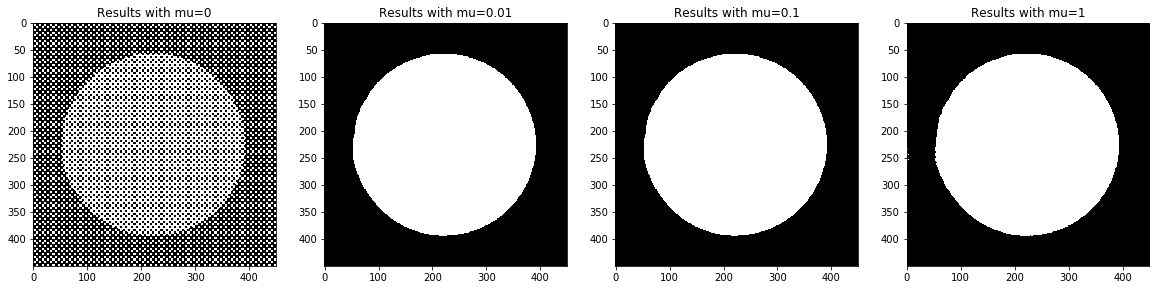

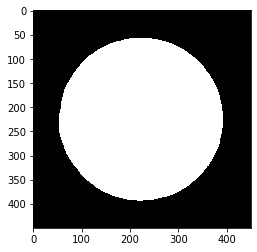

In [375]:
### MU

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, mu in enumerate([0, 0.01, 0.1, 1]):
    segmentation = seg.chan_vese(potentials[2][1], mu=mu, lambda1=1, lambda2=1, init_level_set='checkerboard')
    
    ax[i].imshow(segmentation, plt.cm.gray)
    ax[i].set_title(f'Results with mu={mu}')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Effect of different potential images:**
    
We try the effect of using different initial images to apply the algorithm to, the raw image, converted to GrayScale and applying a Gaussian or a Canny filter. The best result is obtained with the *Gaussian filter*, as the non-filtered images (original and grayscale) have a lot of edges for the table woord pattern lines, which are smoothed using the Gaussian filter. Using Canny we should obtain even better results as we only have to deal with the edges we are interested in, and the rest is removed, but finding the optimal parameters for Canny is difficult, and it usually produces some background noisy edges which confuse the snake and give undesired results.
    
**Effect of different parameters:**
    
We will only do some experiments for the most relevant parameters.

- __*mu*__ 
- __*lambda1*__ makes the output snake line smoother the greater this values is.
- __*lambda2*__ sets explicitly the time step for each iterations. We've found that the default parameter *0.01* works perfectly fine.
- __*init_level_set*__    
    
**Algorithm base:** 
   
</div>

c) Plot the original image and the results of the above algorithms in a 1x3 subplot.
- Comment the differences between each method as well as their advantages and disadvantages.

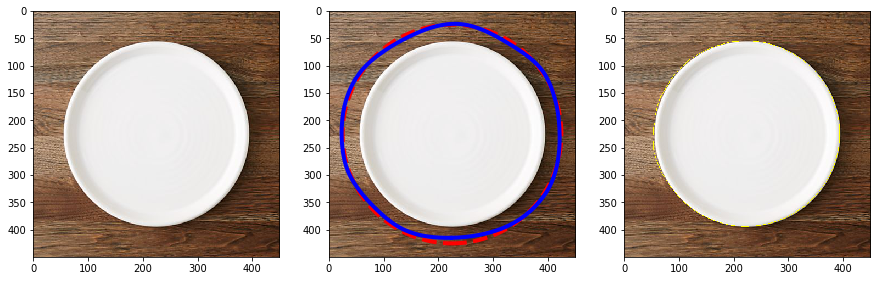

In [282]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)

ax[1].imshow(img)
ax[1].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
ax[1].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)

ax[2].imshow(marked_boundaries)

plt.show()

d) Read **'chocolate.jpg'** from the folder 'images' and segment it using **the above segmentation algorithms.**
- Plot the results of the above algorithms in a 1x3 plot.
- Comment on the results between the segments obtained using 'empty_plate' image and the 'chocolate' image.

In [362]:
img = io.imread(os.path.join('images', 'chocolate.jpg'))
img = resize(img, (img.shape[0] / 2, img.shape[1] / 2, 3))
preprocessed_img = filt.gaussian(rgb2gray(img), 3)

In [363]:
snake = create_circumference((img.shape[0], img.shape[1]), 255)
opt_snake = seg.active_contour(preprocessed_img, snake, alpha=0.1, beta=10, coordinates='rc')

In [323]:
segmentation = seg.chan_vese(preprocessed_img, mu=0.25, lambda1=1, lambda2=1, init_level_set='checkerboard')
marked_boundaries = seg.mark_boundaries(img, segmentation)

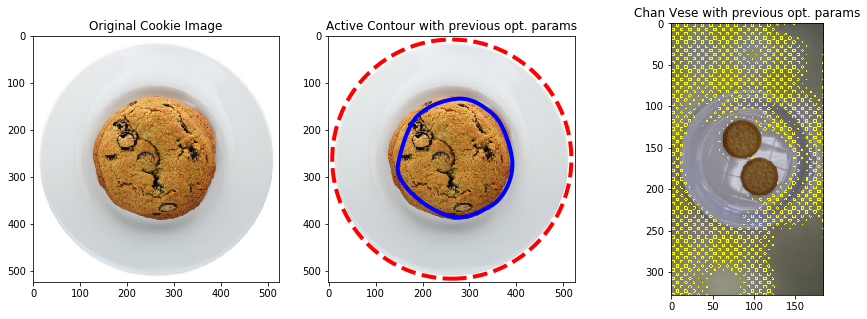

In [364]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title('Original Cookie Image')

ax[1].imshow(img)
ax[1].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
ax[1].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
ax[1].set_title('Active Contour with previous opt. params')

ax[2].imshow(marked_boundaries)
ax[2].set_title('Chan Vese with previous opt. params')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
- Using `active_contour` with the same parameters than in plate, causes a different effect, detecting the cookie edges instead of the plate edges, as the difference of gradients between the plate and the background (also white) is much smaller than the difference between the plate and the cookie. We can fix it to detect the plate agian with a smaller *alpha=0.01*.
    
- Using Chain-Vese
    
</div>

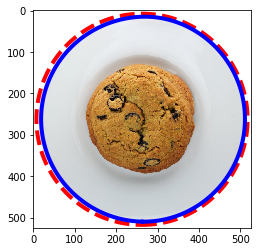

In [325]:
opt_snake = seg.active_contour(preprocessed_img, snake, alpha=0.01, beta=10, coordinates='rc')
plt.imshow(img)
plt.plot(snake[:, 0], snake[:, 1], '--r', lw=4)
plt.plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
plt.show()

e) Read **'2.jpg'** from the folder 'images' and segment it using **any one segmentation algorithm.**
- Segment the image into plate and biscuit.
- Find the number of biscuits on the plate.

Hint:
- skimage.measure.label is used to label connected regions of an integer array.
- skimage.color.label2rgb is used to return an RGB image where the color-coded labels are painted over the image.
- skimage.measure.regionprops is used to measure properties of labeled image regions.

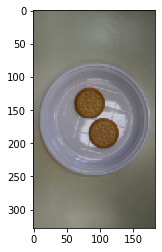

In [366]:
from skimage.transform import resize

img = io.imread(os.path.join('images', '2.jpg'))
img = resize(img, (img.shape[0] / 10, img.shape[1] / 10, 3))
preprocessed_img = filt.gaussian(rgb2gray(img), 3)

plt.imshow(img)
plt.show()

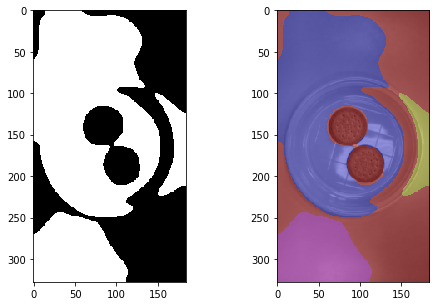

In [367]:
from skimage import measure
from skimage.color import label2rgb

segmentation = seg.chan_vese(preprocessed_img, mu=0.35, lambda1=10, lambda2=10, init_level_set='checkerboard')
marked_boundaries = seg.mark_boundaries(img, segmentation)

labels = measure.label(segmentation)
rgb_labels = label2rgb(labels, image=img)
props = measure.regionprops(labels)

f, ax = plt.subplots(1, 2, figsize=(8, 5))
ax[0].imshow(segmentation, cmap=plt.cm.gray)
ax[1].imshow(rgb_labels)
plt.show()

## Delivery

**Compressed file**
- P7-8_Student1_Student2.zip that includes:
- The notebook P7-8_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used to run your notebook.

**Deadline (Campus Virtual): December 2nd, 11:00 p.m.**